
# 1 Rotation

1.1 Your answer here

1.2 Your answer here

1.3.a your answer here

1.3.b your answer here

1.3.c.i


1.3.c.ii

In [2]:
# Note Matplotlib is only suitable for simple 3D visualization.
# For later problems, you should not use Matplotlib to do the plotting
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
def show_points(points):
    fig = plt.figure()
    # ax = fig.gca(projection = '3d')
    ax = fig.add_axes(Axes3D(fig))
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[0], points[2], points[1])
    
def compare_points(points1, points2):
    fig = plt.figure()
    # ax = fig.gca(projection = '3d')
    ax = fig.add_axes(Axes3D(fig))
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    # ax.scatter([0] * len(points1[0]), points1[2], points1[1])
    # ax.scatter(points1[0], [0] * len(points1[0]), points1[1])
    # ax.scatter(points1[2], points1[1], [0] * len(points1[0]))
    ax.scatter(points1[0], points1[2], points1[1]) # right->x, in->y, up->z
    ax.scatter(points2[0], points2[2], points2[1])    

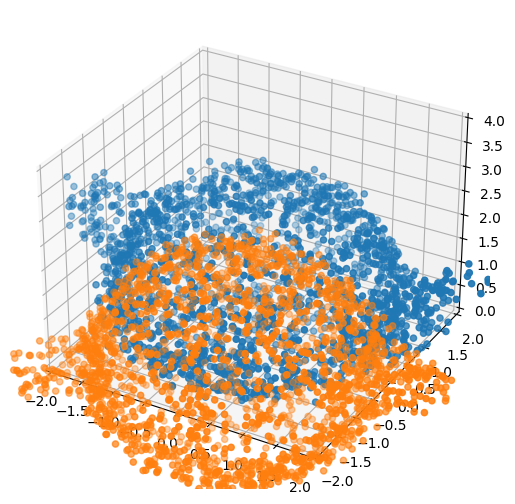

In [3]:
npz = np.load('HW1_P1.npz')
X = npz['X']
Y = npz['Y']
# print(X)
compare_points(X, Y)  # noisy teapotsand

In [4]:
# copy-paste your hw0 solve module here
def hw0_solve(A, b, eps):
    x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

    # case 1: unconstraint least square
    if x @ x < eps:
        return x
    
    # case 2: linear search over lambda s. t. xTx-epsilon goes to 0 (xTx goes to epsilon)
    d, U = np.linalg.eigh(A.T@A) # SVD of A may be faster
    k = U.T@(A.T@b)
    def func(lam):
        return ((k / (d + 2 * lam))**2).sum() - eps
    def dfunc(lam):
        return -4 * ((k**2 / (d+2*lam)**3)).sum()
    
    # Newton, should converge in less than 10 iterations
    lam = 0
    while True:
        lam2 = lam - func(lam) / dfunc(lam)
        if abs(lam-lam2) < 1e-6:
            break
        lam = lam2
    x = U@(np.diag(1/(d + 2 * lam))@(U.T@(A.T@b)))
    return x

In [5]:
R1 = np.eye(3)
# solve this problem here, and store your final results in R1
for __ in range(100):
    
    pass

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

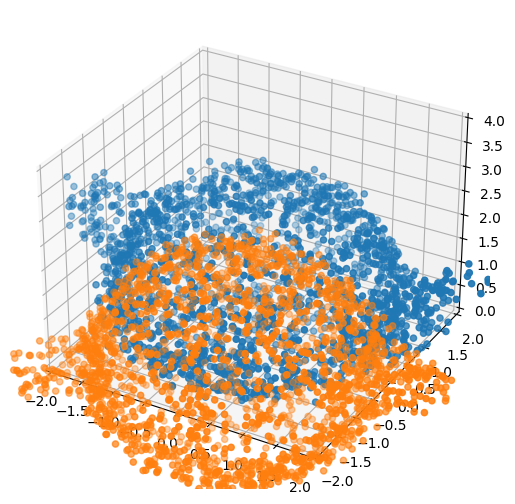

In [6]:
# Testing code, you should see the points of the 2 teapots roughly overlap
compare_points(R1@X, Y)
R1.T@R1

1.4.a your solution here

1.4.b your solution here

# 2 Geometry

2.1 your solution here

2.2

In [7]:
a, b, c = 1, 1, 0.5

In [8]:
# These are some convenient functions to create open3d geometries and plot them
# The viewing direction is fine-tuned for this problem, you should not change them
import open3d
import math
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)
    
def create_arrow_from_vector(origin, vector):
    '''
    origin: origin of the arrow
    vector: direction of the arrow
    '''
    v = np.array(vector)
    v /= np.linalg.norm(v)
    z = np.array([0,0,1])
    angle = np.arccos(z@v)
    
    arrow = open3d.geometry.TriangleMesh.create_arrow(0.05, 0.1, 0.25, 0.2)
    arrow.paint_uniform_color([1,0,1])
    T = np.eye(4)
    T[:3, 3] = np.array(origin)
    T[:3,:3] = open3d.geometry.get_rotation_matrix_from_axis_angle(np.cross(z, v) * angle)
    arrow.transform(T)
    return arrow

def create_ellipsoid(a,b,c):
    sphere = open3d.geometry.TriangleMesh.create_sphere()
    sphere.transform(np.diag([a,b,c,1]))
    sphere.compute_vertex_normals()
    return sphere


def create_lines(points):
    lines = []
    for p1, p2 in zip(points[:-1], points[1:]):
        height = np.linalg.norm(p2-p1)
        center = (p1+p2) / 2
        d = p2-p1
        d /= np.linalg.norm(d)
        axis = np.cross(np.array([0,0,1]), d)
        axis /= np.linalg.norm(axis)
        angle = np.arccos(np.array([0,0,1]) @ d)
        R = open3d.geometry.get_rotation_matrix_from_axis_angle(axis * angle)
        
        T = np.eye(4)
        T[:3,:3]=R
        T[:3,3] = center
        cylinder = open3d.geometry.TriangleMesh.create_cylinder(0.02, height)
        cylinder.transform(T)
        cylinder.paint_uniform_color([1,0,0])
        lines.append(cylinder)
    return lines

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


TriangleMesh with 124 points and 240 triangles.


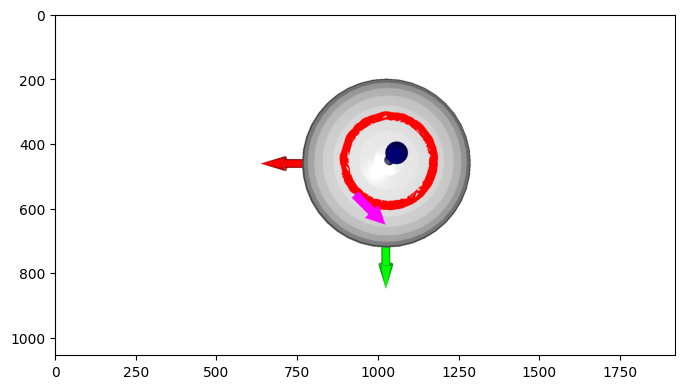

In [9]:
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)


# 2.2: Draw the 3D curve
pts = get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100)
# print(pts)
curve = create_lines(pts)

# 2.3.c: Draw Dfp(v) on the ellipsoid
arrow = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [-math.sqrt(2)/4, math.sqrt(2)/4, 0])

# 2.3.e: Draw orthonomal bases


# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
# print(curve)
# draw_geometries([ellipsoid, cf, arrow])
draw_geometries([ellipsoid, cf, arrow] + curve)

2.3.a your computation here

2.3.b

2.3.c:

TriangleMesh with 124 points and 240 triangles.


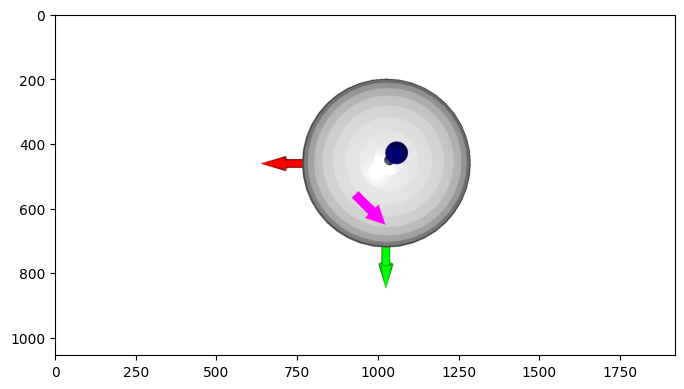

In [10]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.3.c: Draw Dfp(v) on the ellipsoid
arrow = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [-math.sqrt(2)/4, math.sqrt(2)/4, 0])

# 2.3.e: Draw orthonomal bases


# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
# print(curve)
# draw_geometries([ellipsoid, cf, arrow] + curve)
draw_geometries([ellipsoid, cf, arrow])

2.3.d

2.3.e:

TriangleMesh with 124 points and 240 triangles.


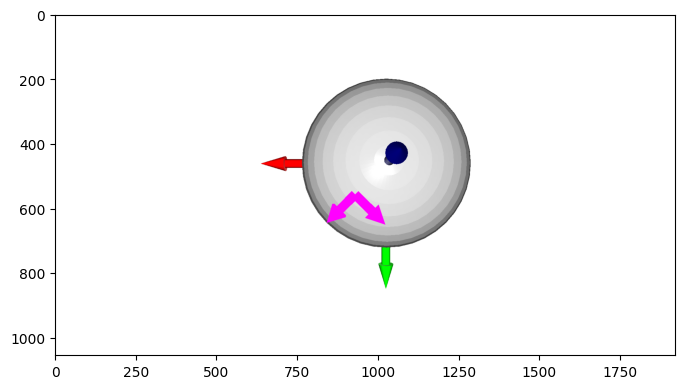

In [11]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.3.e: Draw orthonomal bases
arrowOrtho1 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [-1/math.sqrt(2), 1/math.sqrt(2), 0])
arrowOrtho2 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [math.sqrt(6)/math.sqrt(13), math.sqrt(6)/math.sqrt(13), -1/math.sqrt(13)])



# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
# print(curve)
# draw_geometries([ellipsoid, cf, arrow] + curve)
draw_geometries([ellipsoid, cf, arrowOrtho1, arrowOrtho2])

2.4.a

2.4.b

2.4.c

2.5.a

2.5.b

2.5.c:

TriangleMesh with 124 points and 240 triangles.


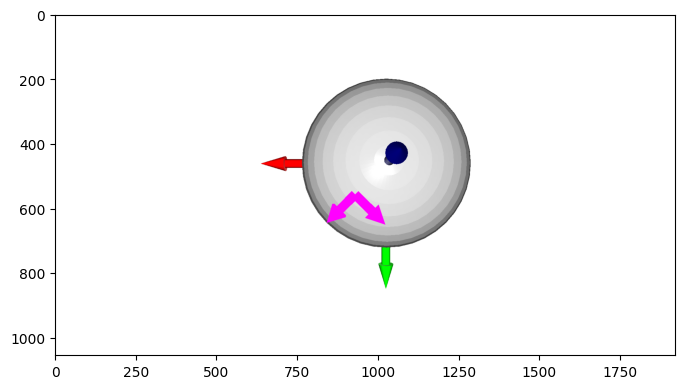

In [12]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.5.c: Draw principle curvature directions at 3D
arrowOrtho1 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [-1/math.sqrt(2), 1/math.sqrt(2), 0])
arrowOrtho2 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], [math.sqrt(6)/math.sqrt(13), math.sqrt(6)/math.sqrt(13), -1/math.sqrt(13)])


# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
# print(curve)
# draw_geometries([ellipsoid, cf, arrow] + curve)
draw_geometries([ellipsoid, cf, arrowOrtho1, arrowOrtho2])

2.5.d

# 3 Mesh

3.1 your proof here

3.2 your proof here

3.3 your solution here

In [13]:
# You may want to restart your notebook here, to reinitialize Open3D

import open3d
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

# Make sure you call this function to draw the points for proper viewing direction
def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1, 0))
    view_ctl.set_front((0, 2, 1))
    view_ctl.set_lookat((0, 0, 0))
    view_ctl.set_zoom(1)
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img))
    for g in geoms:
        vis.remove_geometry(g)

<trimesh.Trimesh(vertices.shape=(10201, 3), faces.shape=(20000, 3), name=`sievert.obj`)>
Principal curvatures ((Kmax, Kmin) corresponding to max and min curvatures):
[[ 1.16586428e-13 -1.16125901e-02]
 [-4.67985026e-14 -1.16334043e-02]
 [-3.63944985e-14 -1.17763662e-02]
 ...
 [ 6.96977198e-14 -4.73133049e-02]
 [ 1.34822709e-13 -5.76065985e+00]
 [ 1.33336051e-13 -3.55466334e-02]]
(20000, 2)
Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 corresponding to Kmax, and x2, y2 corresponding to Kmin):
[[ 0.03422705 -0.99941408 -0.11111641  0.9938074 ]
 [-0.03454718 -0.99940307 -0.11175038 -0.99373631]
 [-0.03419781 -0.99941508 -0.11259544 -0.99364091]
 ...
 [-0.03495435 -0.99938891 -0.10076161 -0.9949106 ]
 [-0.02862704 -0.99959016 -0.88922524  0.45746963]
 [-0.02848466 -0.99959423 -0.09610212  0.99537148]]
(20000, 4)


Text(0.5, 1.0, "Sievert's surface")

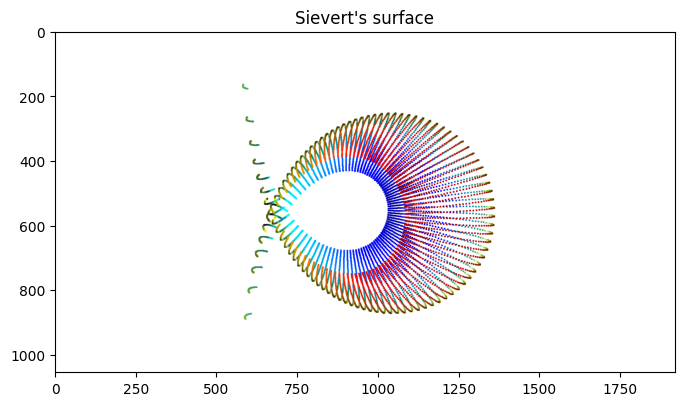

In [14]:
# Principal curvature computations for sievert.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

mesh = trimesh.load('sievert.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces
pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
# print(faces, len(faces))
# print(norms, len(norms))
# print(verts, len(verts))

# Rusinkiewicz's algorithm for computing the curvatures
for i in range(len(faces)):
    # Solve S
    face = faces[i]
    p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
    n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
    e1, e2, e0 = p0-p2, p1-p0, p2-p1
    ksaiu = e2 / np.linalg.norm(e2)
    ksaiv = np.cross(n0, ksaiu)
    ksaiv /= np.linalg.norm(ksaiv)
    # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
    
    Df = np.vstack((ksaiu, ksaiv)).T
    # print(Df, Df.shape)
    # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
    A = np.vstack((
                np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
               np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
               np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
               np.concatenate((np.array([0,0]), (Df.T@e1).T)),
               np.concatenate(((Df.T@e2).T, np.array([0,0]))),
               np.concatenate((np.array([0,0]), (Df.T@e2).T))
               ))
    b = np.concatenate((Df.T@(n2-n1), 
                   Df.T@(n0-n2), 
                   Df.T@(n1-n0))).T # 6*1 matrix
    # print(A, A.shape)
    # print(b, b.shape)
    s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
    S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
    # Eigen-decompose S to get principal directions and curvatures
    fpcurs, fpdirs = np.linalg.eig(S)
    if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
        fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
        fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
    # update the principal curvature set
    # print(fpcurs, fpcurs.shape)
    # print(fpdirs, fpdirs.shape)
    pcurs[i] = fpcurs
    # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
    pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    

print("Principal curvatures ((Kmax, Kmin) corresponding to max and min curvatures):")
print(pcurs)
print(pcurs.shape)
print("Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 corresponding to Kmax, and x2, y2 corresponding to Kmin):")
print(pdirs)
print(pdirs.shape)

draw_geometries([pcd])
plt.title("Sievert's surface")

<trimesh.Trimesh(vertices.shape=(61432, 3), faces.shape=(20480, 3), name=`icosphere.obj`)>
Principal curvatures ((Kmax, Kmin) corresponding to max and min curvatures):
[[1.197281   1.08617268]
 [1.2637722  0.89339637]
 [1.56127018 1.22152556]
 ...
 [1.12145781 0.8692251 ]
 [1.31803086 0.73781594]
 [1.21171006 1.21171006]]
(20480, 2)
Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 corresponding to Kmax, and x2, y2 corresponding to Kmin):
[[ 0.99999782  0.00208966  0.95085472  0.30963738]
 [ 0.99977965 -0.02099193  0.0565818   0.99839797]
 [ 0.65196255 -0.75825117 -0.98895485 -0.1482171 ]
 ...
 [ 0.15666677 -0.98765152 -0.59521006 -0.80357015]
 [ 0.99864915 -0.05196024  0.00569803  0.99998377]
 [-0.35240925  0.9340836  -0.35240925  0.9340836 ]]
(20480, 4)


Text(0.5, 1.0, "Sievert's surface")

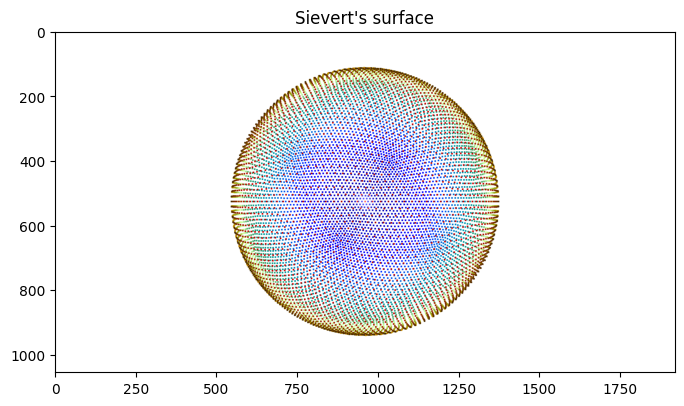

In [15]:
# Principal curvature computations for icosphere.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

mesh = trimesh.load('icosphere.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces
pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
# print(faces, len(faces))
# print(norms, len(norms))
# print(verts, len(verts))

# Rusinkiewicz's algorithm for computing the curvatures
for i in range(len(faces)):
    # Solve S
    face = faces[i]
    p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
    n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
    e1, e2, e0 = p0-p2, p1-p0, p2-p1
    ksaiu = e2 / np.linalg.norm(e2)
    ksaiv = np.cross(n0, ksaiu)
    ksaiv /= np.linalg.norm(ksaiv)
    # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
    
    Df = np.vstack((ksaiu, ksaiv)).T
    # print(Df, Df.shape)
    # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
    A = np.vstack((
                np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
               np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
               np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
               np.concatenate((np.array([0,0]), (Df.T@e1).T)),
               np.concatenate(((Df.T@e2).T, np.array([0,0]))),
               np.concatenate((np.array([0,0]), (Df.T@e2).T))
               ))
    b = np.concatenate((Df.T@(n2-n1), 
                   Df.T@(n0-n2), 
                   Df.T@(n1-n0))).T # 6*1 matrix
    # print(A, A.shape)
    # print(b, b.shape)
    s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S matrix entries solved
    S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix solved
    # Eigen-decompose S to get principal directions and curvatures
    fpcurs, fpdirs = np.linalg.eig(S)
    if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
        cp = np.copy(fpcurs[0])
        fpcurs[0] = fpcurs[1] 
        fpcurs[1] = cp
        cp = np.copy(fpdirs[:,0])
        fpdirs[:,0] = fpdirs[:,1] 
        fpdirs[:,1] = cp
    # update the principal curvature set
    # print(fpcurs, fpcurs.shape)
    # print(fpdirs, fpdirs.shape)
    pcurs[i] = fpcurs
    # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
    pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    

print("Principal curvatures ((Kmax, Kmin) corresponding to max and min curvatures):")
print(pcurs)
print(pcurs.shape)
print("Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 corresponding to Kmax, and x2, y2 corresponding to Kmin):")
print(pdirs)
print(pdirs.shape)

draw_geometries([pcd])
plt.title("Sievert's surface")

3.4:

<trimesh.Trimesh(vertices.shape=(10201, 3), faces.shape=(20000, 3), name=`sievert.obj`)>
Gaussian curvatures for Sievert.obj:
[-1.35387040e-15  5.44425903e-16  4.28594941e-16 ... -3.29762947e-15
 -7.76667765e-13 -4.73964771e-15]
Mean curvatures for Sievert.obj:
[-0.0058063  -0.0058167  -0.00588818 ... -0.02365665 -2.88032993
 -0.01777332]


Text(0.5, 1.0, "Sievert's surface")

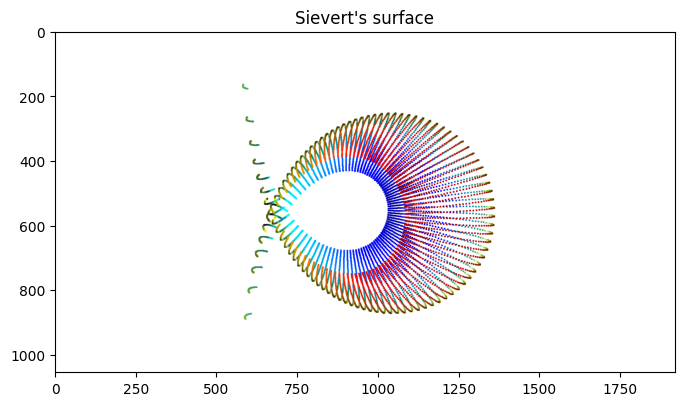

In [71]:
# Gaussian and Mean Curvature computations for sievert.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

def curvature_to_Gaussian(curv):
    "Convert to Gaussian curvature"
    return curv[:,0]*curv[:,1]

def curvature_to_Mean(curv):
    "Convert to Mean curvature"
    return (curv[:,0]+curv[:,1])/2

mesh = trimesh.load('sievert.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces
pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
# print(faces, len(faces))
# print(norms, len(norms))
# print(verts, len(verts))

# Rusinkiewicz's algorithm for computing the curvatures
for i in range(len(faces)):
    # Solve S
    face = faces[i]
    p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
    n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
    e1, e2, e0 = p0-p2, p1-p0, p2-p1
    ksaiu = e2 / np.linalg.norm(e2)
    ksaiv = np.cross(n0, ksaiu)
    ksaiv /= np.linalg.norm(ksaiv)
    # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
    
    Df = np.vstack((ksaiu, ksaiv)).T
    # print(Df, Df.shape)
    # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
    A = np.vstack((
                np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
               np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
               np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
               np.concatenate((np.array([0,0]), (Df.T@e1).T)),
               np.concatenate(((Df.T@e2).T, np.array([0,0]))),
               np.concatenate((np.array([0,0]), (Df.T@e2).T))
               ))
    b = np.concatenate((Df.T@(n2-n1), 
                   Df.T@(n0-n2), 
                   Df.T@(n1-n0))).T # 6*1 matrix
    # print(A, A.shape)
    # print(b, b.shape)
    s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
    S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
    # Eigen-decompose S to get principal directions and curvatures
    fpcurs, fpdirs = np.linalg.eig(S)
    if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
        fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
        fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
    # update the principal curvature set
    # print(fpcurs, fpcurs.shape)
    # print(fpdirs, fpdirs.shape)
    pcurs[i] = fpcurs
    # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
    pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    
pGauSie = curvature_to_Gaussian(pcurs)
pMeanSie = curvature_to_Mean(pcurs)
print("Gaussian curvatures for Sievert.obj:")
print(pGauSie)
print("Mean curvatures for Sievert.obj:")
print(pMeanSie)

draw_geometries([pcd])
plt.title("Sievert's surface")

<trimesh.Trimesh(vertices.shape=(559, 3), faces.shape=(960, 3), name=`sphere.obj`)>
Gaussian curvatures for sphere.obj:
[ 6.94299986e-01  1.48009428e-01 -7.73106748e-01 -1.14706798e+00
 -7.44729851e-01 -7.35622960e-01 -7.76188894e-01 -9.20069000e-01
 -9.33016040e-01 -9.43672706e-01 -9.51701076e-01 -9.56691569e-01
 -9.58535123e-01 -9.57158598e-01 -9.52545344e-01 -1.37680811e-04
 -1.47897155e-04 -9.21943905e-01 -9.07457623e-01 -8.91680442e-01
 -8.75212629e-01 -8.58738754e-01 -8.42805102e-01 -8.28112453e-01
 -8.15151981e-01 -7.33704456e-01 -9.91381480e-01 -6.87342044e-01
 -7.16490880e-01 -7.45927560e-01  1.50706837e-01  6.86455051e-01
  4.77655368e-01  5.16693367e-01  4.60102466e-01 -4.56038182e-01
 -4.17772814e-01  5.20537038e-01 -5.51909278e-01  7.87687591e-01
 -4.01572782e-01  4.90967095e-01 -4.79429333e-01  4.79398307e-01
 -4.45315854e-01  4.82068741e-01 -4.15216519e-01  5.40688297e-01
 -4.15216746e-01  5.40696934e-01 -4.15216168e-01  5.40684678e-01
 -5.76789518e-02  6.28992871e-01  3

Text(0.5, 1.0, "Sievert's surface")

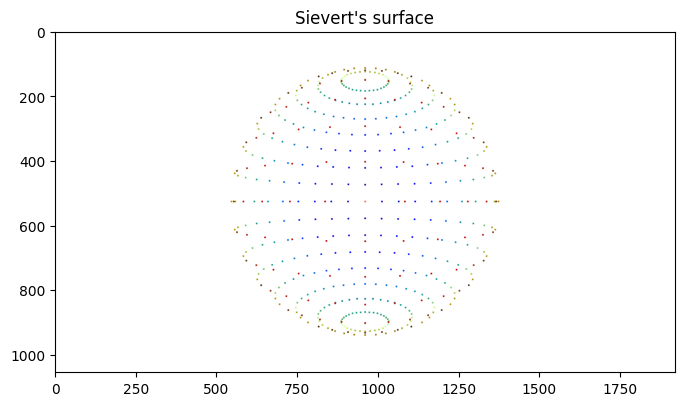

In [53]:
# Gaussian and Mean Curvature computations for sphere.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

def curvature_to_Gaussian(curv):
    "Convert to Gaussian curvature"
    return curv[:,0]*curv[:,1]

def curvature_to_Mean(curv):
    "Convert to Mean curvature"
    return (curv[:,0]+curv[:,1])/2

mesh = trimesh.load('sphere.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces
pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
# print(faces, len(faces))
# print(norms, len(norms))
# print(verts, len(verts))

# Rusinkiewicz's algorithm for computing the curvatures
for i in range(len(faces)):
    # Solve S
    face = faces[i]
    p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
    n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
    e1, e2, e0 = p0-p2, p1-p0, p2-p1
    ksaiu = e2 / np.linalg.norm(e2)
    ksaiv = np.cross(n0, ksaiu)
    ksaiv /= np.linalg.norm(ksaiv)
    # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
    
    Df = np.vstack((ksaiu, ksaiv)).T
    # print(Df, Df.shape)
    # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
    A = np.vstack((
                np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
               np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
               np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
               np.concatenate((np.array([0,0]), (Df.T@e1).T)),
               np.concatenate(((Df.T@e2).T, np.array([0,0]))),
               np.concatenate((np.array([0,0]), (Df.T@e2).T))
               ))
    b = np.concatenate((Df.T@(n2-n1), 
                   Df.T@(n0-n2), 
                   Df.T@(n1-n0))).T # 6*1 matrix
    # print(A, A.shape)
    # print(b, b.shape)
    s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
    S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
    # Eigen-decompose S to get principal directions and curvatures
    fpcurs, fpdirs = np.linalg.eig(S)
    if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
        fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
        fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
    # update the principal curvature set
    # print(fpcurs, fpcurs.shape)
    # print(fpdirs, fpdirs.shape)
    pcurs[i] = fpcurs
    # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
    pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    
pGauSph = curvature_to_Gaussian(pcurs)
pMeanSph = curvature_to_Mean(pcurs)
print("Gaussian curvatures for sphere.obj:")
print(pGauSph)
print("Mean curvatures for sphere.obj:")
print(pMeanSph)

draw_geometries([pcd])
plt.title("Sievert's surface")

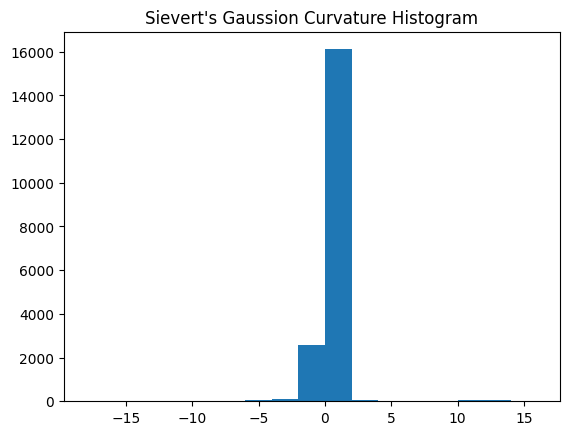

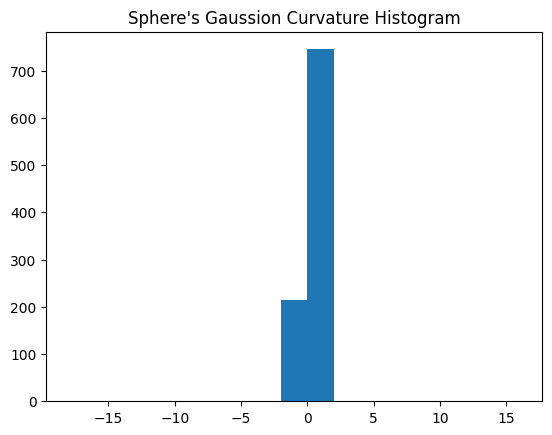

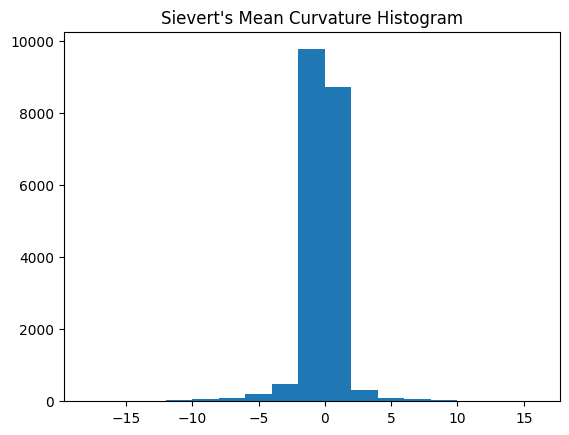

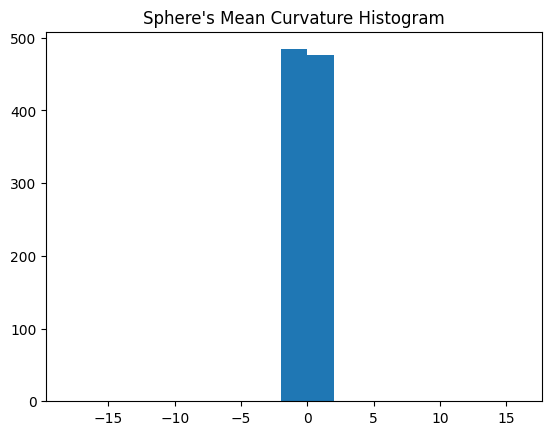

In [72]:
# Comparing Mean and Gaussian curvatures of sphere.obj and sievert.obj (Run the above 2 Gaussian and Mean curvature computations first before running this cell!) 
from matplotlib import pyplot as plt 
import numpy as np  
fig = plt.figure()

# Gaussian plots:
# For Sievert's surface
plt.hist(pGauSie, bins = range(-18, 18, 2)) 
plt.title("Sievert's Gaussion Curvature Histogram") 
plt.show()
 
# For Sphere's surface
plt.hist(pGauSph, bins = range(-18, 18, 2)) 
plt.title("Sphere's Gaussion Curvature Histogram") 
plt.show()
# We see that the Gaussian Curvature histograms of the two objects are roughly the same,
# which verifies that they're isometric.

# Mean plots:
# For Sievert's surface
plt.hist(pMeanSie, bins = range(-18, 18, 2)) 
plt.title("Sievert's Mean Curvature Histogram") 
plt.show()
 
# For Sphere's surface
plt.hist(pMeanSph, bins = range(-18, 18, 2)) 
plt.title("Sphere's Mean Curvature Histogram") 
plt.show()

# print(pMeanSph)
# print(pMeanSie)
# print(max(pMeanSie), min(pMeanSie))
# print(max(pMeanSph), min(pMeanSph))
# print(max(pGauSie), min(pGauSie))
# print(max(pGauSph), min(pGauSph))
# # For Sievert's surface
# plt.hist(pMeanSie, bins = range(-20, 20, 2)) 
# plt.title("Sievert's Mean Curvature Histogram") 
# plt.show()
 
# # For Sphere's surface
# plt.hist(pMeanSph, bins = range(-20, 20, 2)) 
# plt.title("Sphere's Mean Curvature Histogram") 
# plt.show()

# 4 Point Cloud

4.1:

<trimesh.Trimesh(vertices.shape=(10201, 3), faces.shape=(20000, 3), name=`sievert.obj`)>
Gaussian curvatures for Sievert.obj:
[-1.35387040e-15  5.44425903e-16  4.28594941e-16 ... -3.29762947e-15
 -7.76667765e-13 -4.73964771e-15]
Mean curvatures for Sievert.obj:
[-0.0058063  -0.0058167  -0.00588818 ... -0.02365665 -2.88032993
 -0.01777332]


Text(0.5, 1.0, "Sievert's surface")

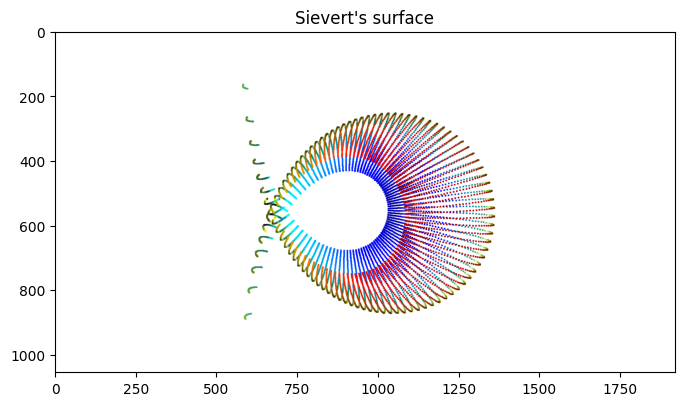

In [ ]:
# Gaussian and Mean Curvature computations for sievert.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

def curvature_to_Gaussian(curv):
    "Convert to Gaussian curvature"
    return curv[:,0]*curv[:,1]

def curvature_to_Mean(curv):
    "Convert to Mean curvature"
    return (curv[:,0]+curv[:,1])/2

mesh = trimesh.load('sievert.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces
pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
# print(faces, len(faces))
# print(norms, len(norms))
# print(verts, len(verts))

# Rusinkiewicz's algorithm for computing the curvatures
for i in range(len(faces)):
    # Solve S
    face = faces[i]
    p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
    n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
    e1, e2, e0 = p0-p2, p1-p0, p2-p1
    ksaiu = e2 / np.linalg.norm(e2)
    ksaiv = np.cross(n0, ksaiu)
    ksaiv /= np.linalg.norm(ksaiv)
    # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
    
    Df = np.vstack((ksaiu, ksaiv)).T
    # print(Df, Df.shape)
    # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
    A = np.vstack((
                np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
               np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
               np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
               np.concatenate((np.array([0,0]), (Df.T@e1).T)),
               np.concatenate(((Df.T@e2).T, np.array([0,0]))),
               np.concatenate((np.array([0,0]), (Df.T@e2).T))
               ))
    b = np.concatenate((Df.T@(n2-n1), 
                   Df.T@(n0-n2), 
                   Df.T@(n1-n0))).T # 6*1 matrix
    # print(A, A.shape)
    # print(b, b.shape)
    s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
    S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
    # Eigen-decompose S to get principal directions and curvatures
    fpcurs, fpdirs = np.linalg.eig(S)
    if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
        fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
        fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
    # update the principal curvature set
    # print(fpcurs, fpcurs.shape)
    # print(fpdirs, fpdirs.shape)
    pcurs[i] = fpcurs
    # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
    pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    
pGauSie = curvature_to_Gaussian(pcurs)
pMeanSie = curvature_to_Mean(pcurs)
print("Gaussian curvatures for Sievert.obj:")
print(pGauSie)
print("Mean curvatures for Sievert.obj:")
print(pMeanSie)

draw_geometries([pcd])
plt.title("Sievert's surface")

4.2 your solution here

4.3 your solution here

4.4 your solution here